# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.info()
# mostly strings, but there's a bunch of datetimes as well, plus one integer data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
# Each row is a licensed pet dog living in New York City.
# "Animal Name" is the name of the pet dog.
# "Owner Zip Code" is the zip code of where the pet owner (thus also where the pet dog) lives.
# "Spayed or Neut" is whether the dog has been spayed or neutered.
# "Guard or Trained" <-- not sure what 'guard' means, but it sounds like it refers to whether the dog is a trained dog.
# "Application Date" is the date the owner applied for their dog's licensing.
# "License Issued Date" is the date the license was approved/ issued.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [5]:
# How could a dog's primary breed be unknown? Just LOOK at the dog?! Or just label it as breed mixed beyond recognition?
# Why does poor Buddy have an unknown Primary Breed, yet could be labelled a Cockapoo under Secondary Breed? 
# Queen is a red dog? Like gurl... And how is Lola's color "apricot". Pet owners surely like to make their pets sound so extra special. The only oddity I can accept is Benson's coat being Brindle. I googled that up. Stuff of envy.
# "Guard or Trained": It's either Yes or No. Why is there a bunch of NaNs. Clearly the question is not well formulated, cause I don't even know what Guard means. I know what trained means.

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

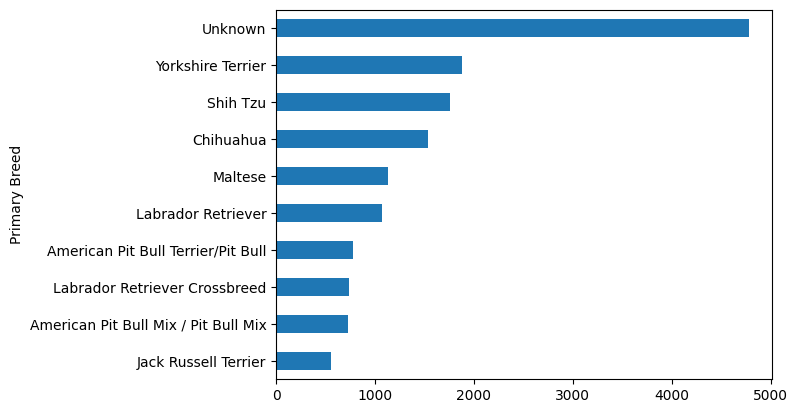

In [6]:
# idk... naming conventions are not kept to a strict standard here. i don't think this can be a meaningful graph, but sure.

df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

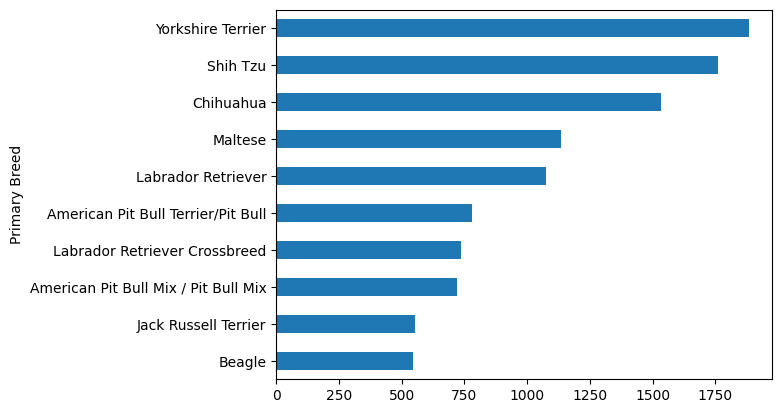

In [7]:
df['Primary Breed'].value_counts().drop('Unknown').head(10).sort_values(ascending=True).plot(kind='barh')

## What are the most popular dog names?

<Axes: ylabel='Animal Name'>

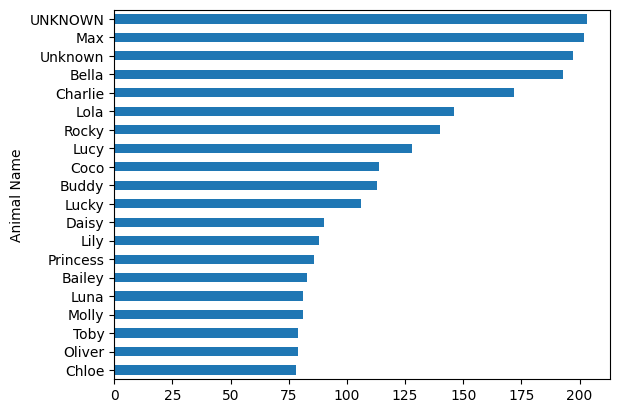

In [8]:
df['Animal Name'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
# amazing that so many owners don't even have names for their dogs
# most popular from what we can discern are Max, Bella, Charlie, Lola, Rocky, etc.

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
df[df['Animal Name'].isin(['Pei Ting', 'PT', 'Mimi'])]
# mimi is my family's pet name for me.
# df['Animal Name'].isin(['Pei Ting', 'PT', 'Mimi']).sum()
# so 24 mimis.

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
786,11201,Mimi,F,"Schnauzer, Miniature",NaN,WHITE,NaN,NaN,2009-04-01,Yes,No,Yes,2014-11-04 14:21:34.867,2014-11-04,2019-11-09
1747,10462,Mimi,F,Yorkshire Terrier,NaN,BLACK,TAN,NaN,2008-10-01,Yes,No,Yes,2015-01-30 08:11:11.780,2015-01-30,2017-02-24
5037,10010,Mimi,F,Japanese Chin/Spaniel,NaN,BLACK,NaN,NaN,2008-07-01,Yes,No,Yes,2015-04-30 08:56:06.797,2015-04-30,2016-05-13
5568,10473,Mimi,F,Maltese,NaN,WHITE,CREAM,NaN,2011-02-01,Yes,No,Yes,2015-05-03 02:31:24.023,2015-05-03,2019-07-07
9642,11104,Mimi,F,Chihuahua,NaN,FAWN,NaN,NaN,2007-01-01,Yes,No,Yes,2015-05-29 15:42:44.253,2015-05-29,2016-06-15
9743,10075,Mimi,F,"Welsh Corgi, Pembroke",NaN,TAN,WHITE,NaN,2004-01-01,Yes,No,Yes,2015-05-30 12:41:38.350,2015-05-30,2016-06-29
10765,11232,Mimi,F,Chihuahua,NaN,CHOCOLATE,WHITE,NaN,2009-08-01,Yes,No,Yes,2015-06-04 16:25:36.563,2015-06-04,2016-05-20
11345,10039,Mimi,F,Chihuahua,NaN,BLACK,BRINDLE,WHITE,2009-10-01,Yes,No,Yes,2015-06-07 21:21:47.750,2015-06-07,2020-06-08
11648,11385,Mimi,F,Poodle,NaN,White,Blond,NaN,2009-06-01,Yes,No,Yes,2015-06-09 13:21:47.393,2015-06-09,2016-06-08
12695,11372,Mimi,F,Cavalier King Charles Spaniel,NaN,Tan,White,NaN,2014-06-01,Yes,NaN,Yes,2015-06-12 18:26:49.113,2015-06-12,2016-06-12


In [10]:
df['Animal Name'].isin(['Max']).sum()
df['Animal Name'].isin(['Maxwell']).sum()
df['Animal Name'].isin(['Maxwell', 'Max']).sum()

# 213 Max and Maxwell 
# 11 Maxwell
# 202 Max

np.int64(213)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [11]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)*100
# 0.06% are guard dogs.

Guard or Trained
No     66.030000
NaN    33.913333
Yes     0.056667
Name: proportion, dtype: float64

## What are the actual numbers?

In [12]:
df['Guard or Trained'].value_counts(dropna=False)
# OH it's just 17 dogs.

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [13]:
# ooo mine adds up, cause i saw that there were NaN figures and accounted for it.

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're making a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [14]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [15]:
guards = df[df['Guard or Trained'] == 'Yes']
guards['Primary Breed'].value_counts(dropna=False)
# not a clear winner cause there are too many unknowns, but it's German Shepherds

Primary Breed
Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

In [16]:
# additional check to confirm my previous answer
guards['Secondary Breed'].value_counts(dropna=False)


Secondary Breed
NaN                         12
Chinese Crested/terrier      1
black russian terrier        1
American Fox Hound           1
Poodle                       1
TERRIER MX                   1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [17]:
df['year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
df['age'] = 2025-df['year']
df['age'].mean()
#They are 15.7 years old on average.

np.float64(15.712433333333333)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [19]:
hoods_df = pd.read_csv('zipcodes-neighborhoods.csv')
merged = hoods_df.merge(df, left_on='zip', right_on='Owner Zip Code')
merged

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,Mid-Island,10314,Staten Island,10314,Juli,F,Greyhound,NaN,WHITE,BLACK,NaN,2005-05-01,Yes,No,Yes,2015-08-21 10:59:20.797,2015-08-21,2016-09-15,2005,20
29569,Mid-Island,10314,Staten Island,10314,MOLLY,F,Unknown,CAVACHON,BLACK,WHITE,NaN,2007-01-01,Yes,No,Yes,2015-08-21 14:48:00.620,2015-08-21,2016-08-30,2007,18
29570,Mid-Island,10314,Staten Island,10314,No Name,F,Shih Tzu,NaN,Gold,White,NaN,2015-04-01,No,No,No,2015-08-22 14:21:51.767,2015-06-28,2016-06-28,2015,10
29571,Mid-Island,10314,Staten Island,10314,charley,M,Shih Tzu,NaN,Gold,White,NaN,2006-06-01,Yes,No,No,2015-08-22 16:08:14.987,2015-08-22,2016-08-22,2006,19


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [20]:
merged[merged['borough'] == 'Bronx']

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,Southeast Bronx,10473,Bronx,10473,Rusty,M,Jack Russell Terrier,NaN,WHITE,RUST,BLACK,2002-01-01,No,No,Yes,2015-08-19 11:12:52.657,2015-08-19,2016-08-30,2002,23
2744,Southeast Bronx,10473,Bronx,10473,LOGAN,M,Pomeranian,NaN,BLACK,BLOND,ORANGE,2012-08-01,Yes,No,Yes,2015-08-19 11:23:01.690,2015-08-19,2016-09-03,2012,13
2745,Southeast Bronx,10473,Bronx,10473,Sassy,F,German Shepherd Dog,NaN,TAN,NaN,NaN,2006-02-01,Yes,No,Yes,2015-08-21 14:41:22.077,2015-08-21,2016-09-01,2006,19
2746,Southeast Bronx,10473,Bronx,10473,Denver,M,Labrador Retriever,NaN,BLACK,NaN,NaN,2012-04-01,Yes,No,Yes,2015-08-21 14:41:22.090,2015-08-21,2016-09-01,2012,13


In [21]:
bronx = merged[merged['borough'] == 'Bronx']
bronx['Animal Name'].value_counts().head(1)

# Bella is the most popular name in Bronx.

Animal Name
Bella    22
Name: count, dtype: int64

In [22]:
brooklyn = merged[merged['borough'] == 'Brooklyn']
brooklyn['Animal Name'].value_counts().head(2)

# Max is the most popular name in Brooklyn.


Animal Name
Unknown    97
Max        46
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [23]:
(merged[merged['Primary Breed'] != 'Unknown']
   .groupby('borough')['Primary Breed']
   .value_counts()
   .groupby(level=0)
   .head(1))

borough        Primary Breed    
Bronx          Yorkshire Terrier    250
Brooklyn       Yorkshire Terrier    501
Manhattan      Chihuahua            511
Queens         Yorkshire Terrier    434
Staten Island  Yorkshire Terrier    171
Name: count, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [24]:
# if it fails dominant color test, then it fails the rest. but if it passes the dominant color test, then it could have other colors lurking in secondary or third color, so the code has to cater for that.

merged['monochrome'] = (
    merged['Animal Dominant Color'].str.lower().isin(['white', 'grey', 'black']) & 
    merged['Animal Secondary Color'].str.lower().isin(['white', 'grey', 'black']) & 
    merged['Animal Third Color'].str.lower().isin(['white', 'grey', 'black'])
)
merged['monochrome'].value_counts()

# 69 dogs are monochrome.

monochrome
False    29504
True        69
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

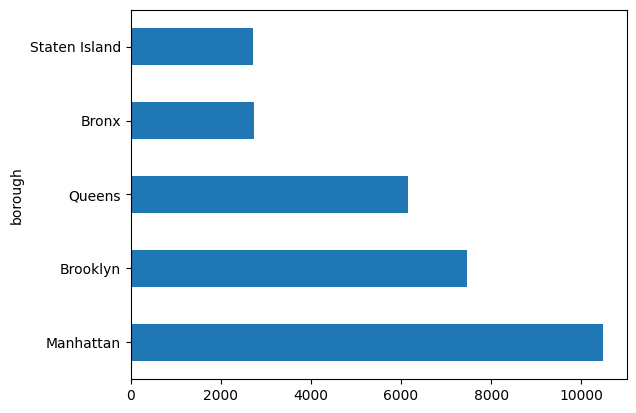

In [25]:
merged['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [26]:
# got so stuck
pop_df = pd.read_csv('boro_population.csv')
# pop_df['number of dogs'] = merged['borough'].value_counts() ????
# merged2 = merged.merge(pop_df, left_on='borough', right_on='borough') ????

# using chatgpt... i want to merge the output of this data -- merged['borough'].value_counts() -- into another dataframe, matching by borough. how do i do it?

# ✅ Step 1 — Turn value_counts into a DataFrame

borough_counts = (
    merged['borough']
    .value_counts()
    .rename('dog_count')           # name the column
    .reset_index()                 # convert to a DataFrame
)
borough_counts.columns = ['borough', 'dog_count']

# ✅ Step 2 — Merge with the other dataframe

merged2 = pop_df.merge(borough_counts, on='borough', how='left')

# back to non-GPT mode. I will calculate dogs per capita using dogs per 1,000 people.

merged2['dog_per_capita'] = merged2['dog_count'] / merged2['population']*1000
merged2.sort_values('dog_per_capita', ascending=False)

# Manhattan has the highest number of dogs per capita

,borough,population,area_sqmi,dog_count,dog_per_capita
0,Manhattan,1644518,23,10478,6.371472
4,Staten Island,474558,59,2727,5.746400
2,Brooklyn,2636735,71,7466,2.831532
3,Queens,2339150,109,6154,2.630870
1,Bronx,1455444,42,2748,1.888084


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [27]:
# referred back to the code that gave us the most common dog breed in each of the neighborhoods of NYC.

(merged[merged['Primary Breed'] != 'Unknown']
   .groupby('borough')['Primary Breed']
   .value_counts()
   .groupby(level=0)
   .head(5))

borough        Primary Breed                     
Bronx          Yorkshire Terrier                     250
               Shih Tzu                              244
               Chihuahua                             208
               American Pit Bull Terrier/Pit Bull    181
               Maltese                               139
Brooklyn       Yorkshire Terrier                     501
               Shih Tzu                              481
               Chihuahua                             391
               Labrador Retriever                    255
               Maltese                               247
Manhattan      Chihuahua                             511
               Yorkshire Terrier                     505
               Shih Tzu                              454
               Labrador Retriever                    422
               Maltese                               332
Queens         Yorkshire Terrier                     434
               Shih Tzu               

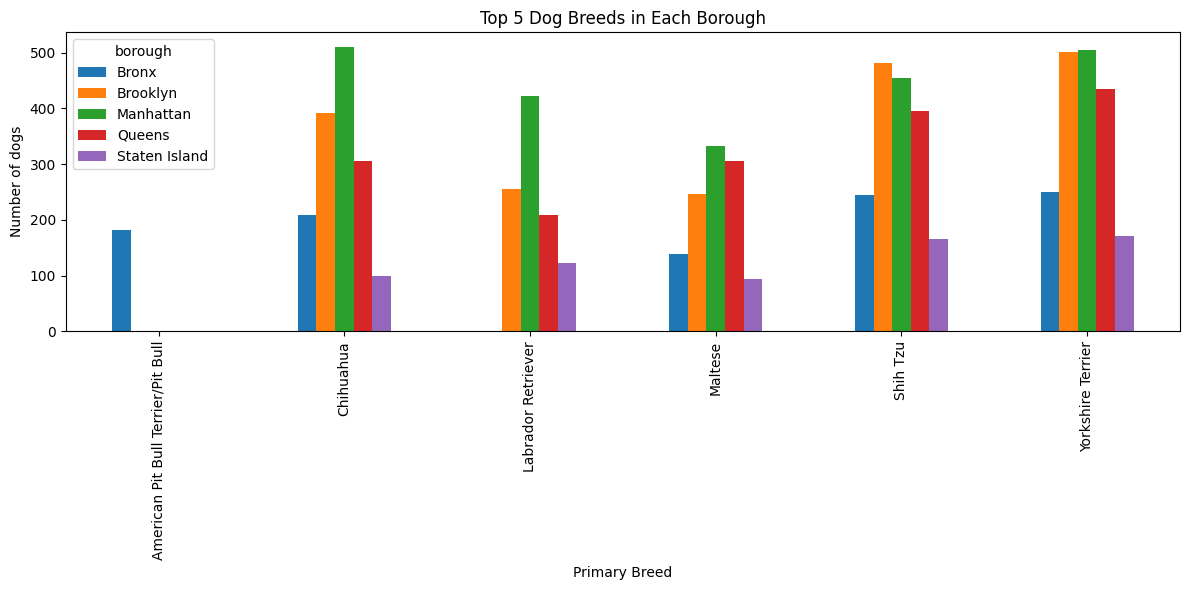

In [28]:
import matplotlib.pyplot as plt

# Saving my existing MultiIndex Series as top5.
top5 = (
    merged[merged['Primary Breed'] != 'Unknown']
      .groupby('borough')['Primary Breed']
      .value_counts()
      .groupby(level=0)
      .head(5)
)

# turn MultiIndex Series into DataFrame
top5_df = top5.reset_index()  # gives borough | Primary Breed | count

# pivot for grouped bar chart
pivoted = top5_df.pivot(index='Primary Breed',
                        columns='borough',
                        values='count')

pivoted.plot(kind='bar', figsize=(12,6))
plt.ylabel("Number of dogs")
plt.title("Top 5 Dog Breeds in Each Borough")
plt.tight_layout()
plt.show()